# Error Per Layered Gate (EPLG)

In [1]:
%load_ext autoreload
%autoreload 2

## Set IQM Token if using Resonance.

In [2]:
import os
os.environ["IQM_TOKEN"] = "xxxxxxxxxxxxxxxxx"

## Choose (or define) a backend

In order to be able to use calibration fidelities as a proxy for selecting a linear chain, we need to specify the calibration URL of the station. If specifying qubit pairs manually, this is not necessary: in this case simply pass the backend as a string name.

In [3]:
# To use calibration fidelities to (automatically) select a linear chain, use the following:
from iqm.qiskit_iqm.iqm_provider import IQMProvider

resonance_station="garnet"
iqm_url=f"https://cocos.resonance.meetiqm.com/{resonance_station}"
cal_url=f"https://api.resonance.meetiqm.com/quantum-computers/v1/{resonance_station}/calibrations"
provider = IQMProvider(iqm_url)
backend = provider.get_backend()

# If manually specifying qubit pairs, use the following:
#backend="garnet"

## Randomized Benchmarking Configuration

NB: Clifford RB is executed by default with Interleaved RB !

In [ ]:
from iqm.benchmarks.randomized_benchmarking.eplg.eplg import *
import numpy as np

In [5]:
EXAMPLE_EPLG = EPLGConfiguration(
    #custom_qubits_array=[[0,1],[1,4],[4,5],[5,6],[6,11],[11,16]],
    drb_depths=sorted(list(set(np.geomspace(1, 200, num=10, endpoint=True, dtype=int).tolist())), reverse=True),
    drb_circuit_samples=25,
    shots=2**8,
    chain_length=19,
    chain_path_samples=200,
    num_disjoint_layers=3,
    max_hamiltonian_path_tries=15,
    calibration_url=cal_url,
)

## Run the experiment

In [6]:
benchmark_eplg = EPLGBenchmark(backend, EXAMPLE_EPLG)
run_eplg = benchmark_eplg.run()

2025-04-02 15:16:17,232 - iqm.benchmarks.logging_config - INFO - Generating linear chain path
2025-04-02 15:16:17,495 - iqm.benchmarks.logging_config - INFO - Extracting the path that maximizes total 2Q calibration fidelity
2025-04-02 15:16:18,667 - iqm.benchmarks.logging_config - INFO - Clifford dictionaries for both systems imported successfully!
2025-04-02 15:16:18,668 - iqm.benchmarks.logging_config - INFO - Executing parallel Direct RB on qubits [(12, 13), (18, 14), (8, 7), (3, 0), (4, 5), (11, 10)] (group 1/3). Will generate and submit all 25 DRB circuits for each depth [200, 111, 61, 34, 18, 10, 5, 3, 1]
2025-04-02 15:16:18,669 - iqm.benchmarks.logging_config - INFO - Depth 200
2025-04-02 15:16:37,917 - iqm.benchmarks.logging_config - INFO - Submitting batch with 25 circuits corresponding to qubits [12, 13, 18, 14, 8, 7, 3, 0, 4, 5, 11, 10]
C:\Users\PedroFigueroaRomero\anaconda3\envs\iqm-bench\Lib\site-packages\iqm\qiskit_iqm\iqm_provider.py:177: UserWarning: Unknown backend opt

## Perform the analysis

In [7]:
result_eplg = benchmark_eplg.analyze()

2025-04-02 15:20:57,474 - iqm.benchmarks.logging_config - INFO - Post-processing parallel Direct RB on qubits [(12, 13), (18, 14), (8, 7), (3, 0), (4, 5), (11, 10)].
2025-04-02 15:20:57,510 - iqm.benchmarks.logging_config - INFO - Depth 200
2025-04-02 15:20:57,599 - iqm.benchmarks.logging_config - INFO - Depth 111
2025-04-02 15:20:57,681 - iqm.benchmarks.logging_config - INFO - Depth 61
2025-04-02 15:20:57,784 - iqm.benchmarks.logging_config - INFO - Depth 34
2025-04-02 15:20:57,858 - iqm.benchmarks.logging_config - INFO - Depth 18
2025-04-02 15:20:57,909 - iqm.benchmarks.logging_config - INFO - Depth 10
2025-04-02 15:20:57,959 - iqm.benchmarks.logging_config - INFO - Depth 5
2025-04-02 15:20:57,995 - iqm.benchmarks.logging_config - INFO - Depth 3
2025-04-02 15:20:58,036 - iqm.benchmarks.logging_config - INFO - Depth 1
2025-04-02 15:20:58,307 - iqm.benchmarks.logging_config - INFO - Post-processing parallel Direct RB on qubits [(13, 17), (14, 9), (7, 2), (0, 1), (5, 6), (10, 15)].
2025

In [8]:
run_eplg.dataset.attrs.keys()

dict_keys(['session_timestamp', 'execution_timestamp', 'backend_configuration_name', 'backend_name', 'benchmark', 'shots', 'max_gates_per_batch', 'max_circuits_per_batch', 'calset_id', 'routing_method', 'physical_layout', 'use_dd', 'dd_strategy', 'qubits_array', 'is_eplg', 'parallel_execution', 'depths', 'num_circuit_samples', 'qiskit_optim_level', 'two_qubit_gate_ensembles', 'densities_2q_gates', 'clifford_sqg_probabilities', 'sqg_gate_ensembles', 'parallel_all_0', 0, 'parallel_all_1', 1, 'parallel_all_2', 2, 'backend_coupling_map', 'backend_num_qubits', 'drb_depths', 'drb_circuit_samples', 'custom_qubits_array', 'chain_length', 'chain_path_samples', 'num_disjoint_layers', 'max_hamiltonian_path_tries', 'calibration_url', 'disjoint_layers', 'edges'])

## Inspect all the fidelities and the final EPLG

In [9]:
for o in result_eplg.observations:
    if o.name != "EPLG":
        print(f"{o.name} {o.identifier.qubit_indices}: {100*o.value:.2f} +/- {100*o.uncertainty:.2f} %")
    else:
        print(f"\n{o.name} {o.identifier.qubit_indices}: {o.value:.2e} +/- {o.uncertainty:.2e}")

average_gate_fidelity (12, 13): 99.09 +/- 0.02 %
average_gate_fidelity (18, 14): 98.92 +/- 0.06 %
average_gate_fidelity (8, 7): 98.59 +/- 0.07 %
average_gate_fidelity (3, 0): 98.04 +/- 0.09 %
average_gate_fidelity (4, 5): 98.95 +/- 0.05 %
average_gate_fidelity (11, 10): 98.62 +/- 0.03 %
average_gate_fidelity (13, 17): 97.99 +/- 0.05 %
average_gate_fidelity (14, 9): 98.97 +/- 0.04 %
average_gate_fidelity (7, 2): 97.37 +/- 0.15 %
average_gate_fidelity (0, 1): 99.06 +/- 0.07 %
average_gate_fidelity (5, 6): 97.58 +/- 0.09 %
average_gate_fidelity (10, 15): 98.68 +/- 0.07 %
average_gate_fidelity (17, 18): 99.26 +/- 0.03 %
average_gate_fidelity (9, 8): 97.98 +/- 0.06 %
average_gate_fidelity (2, 3): 99.00 +/- 0.05 %
average_gate_fidelity (1, 4): 97.48 +/- 0.17 %
average_gate_fidelity (6, 11): 99.27 +/- 0.02 %
average_gate_fidelity (15, 16): 98.30 +/- 0.10 %
layer_fidelity (n_qubits=19): 76.28 +/- 0.26 %
eplg (n_qubits=19): 1.49 +/- 0.02 %


## Plot a visualization of the selected layers and all the DRB decays

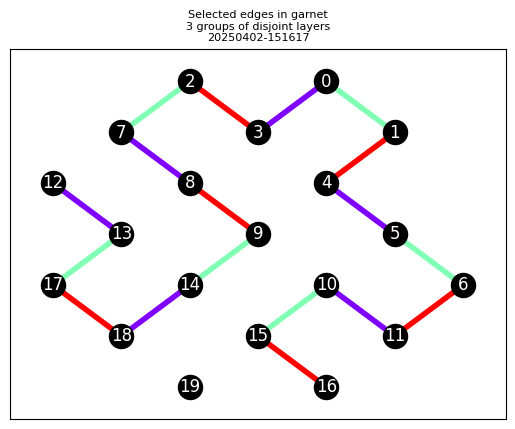

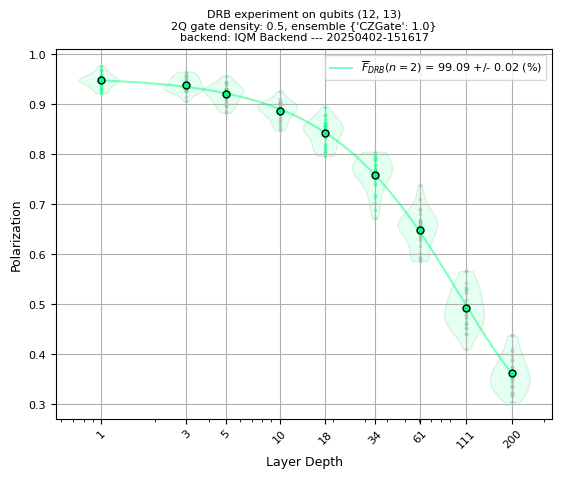

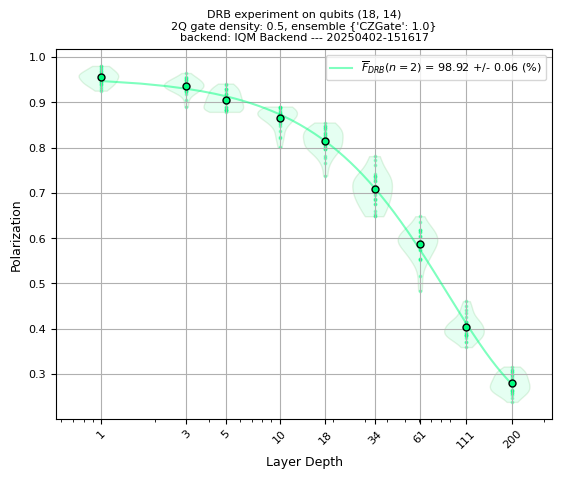

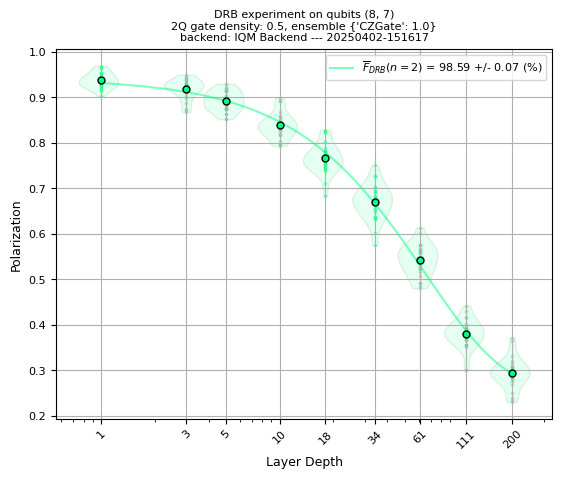

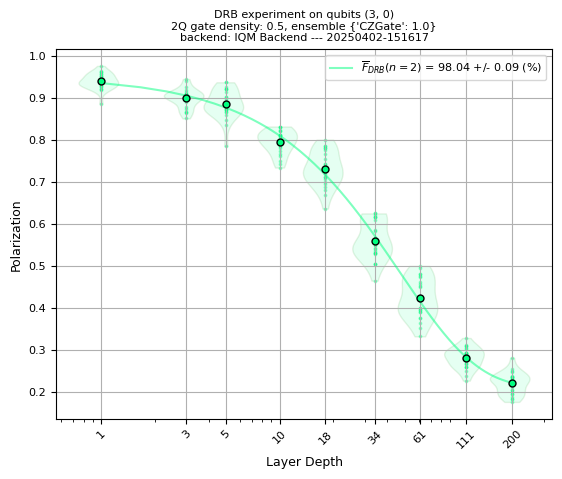

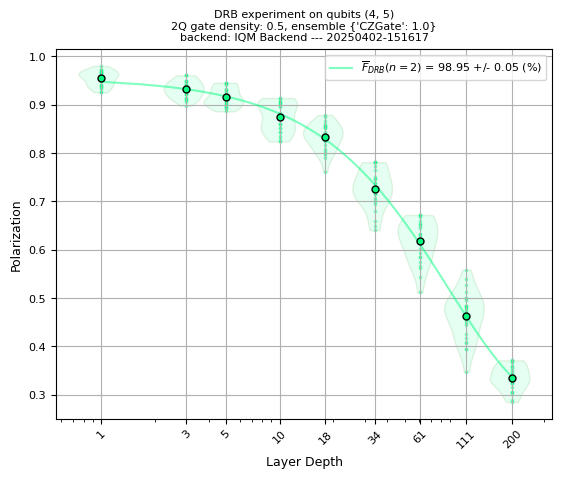

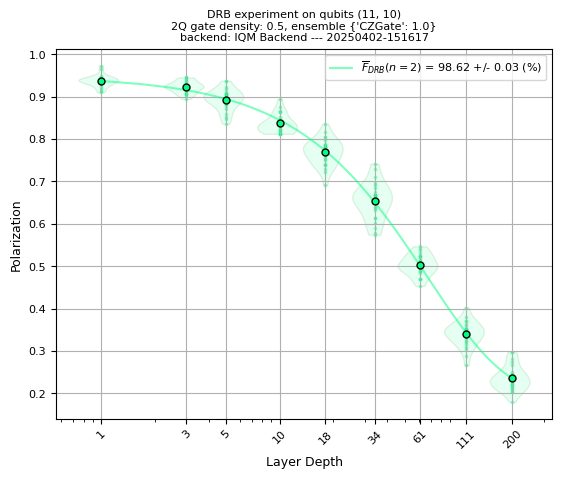

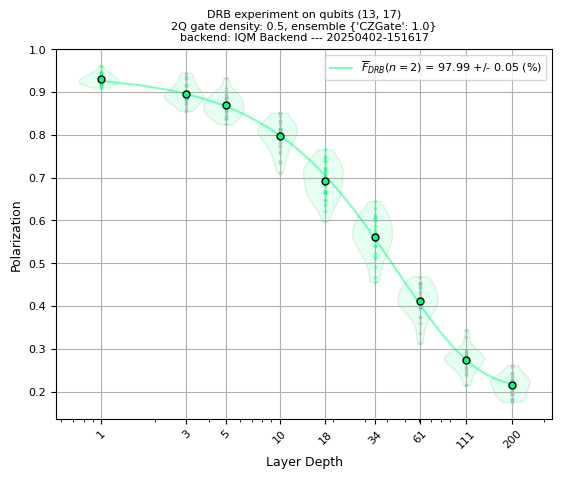

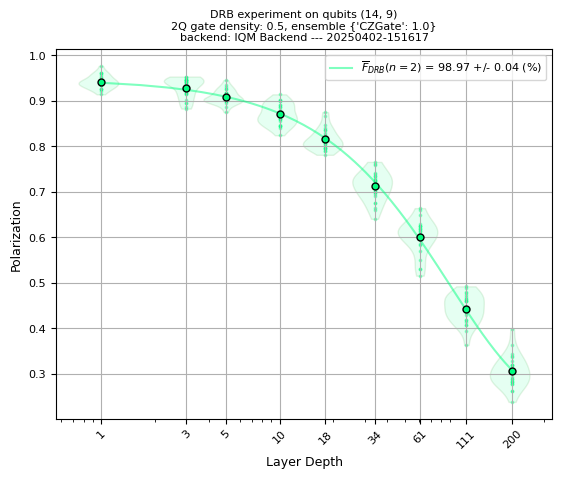

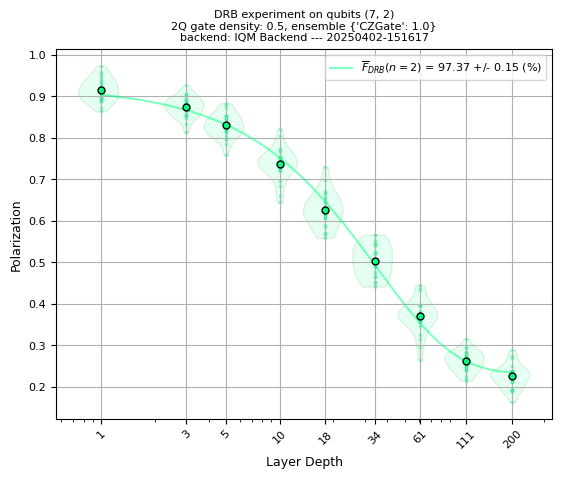

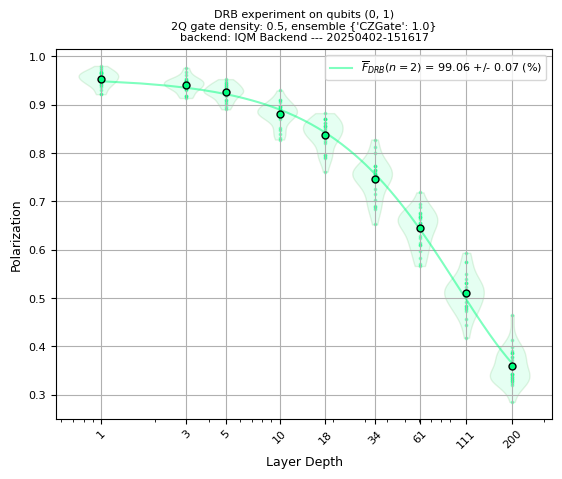

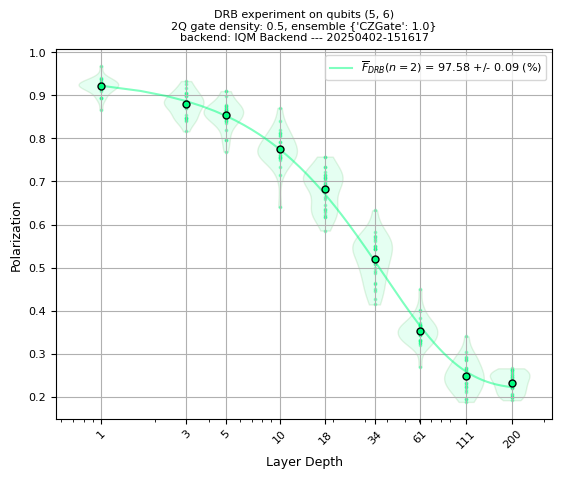

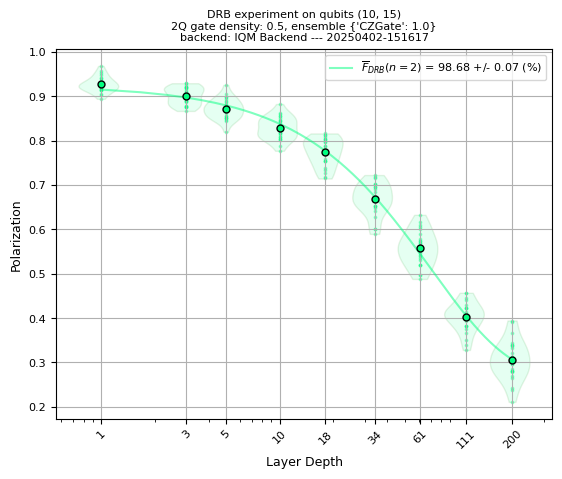

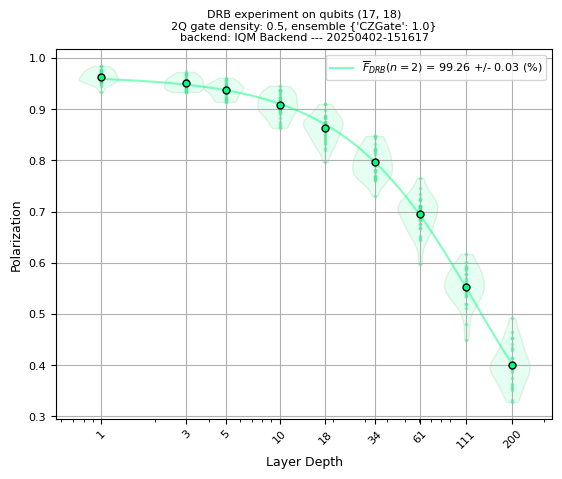

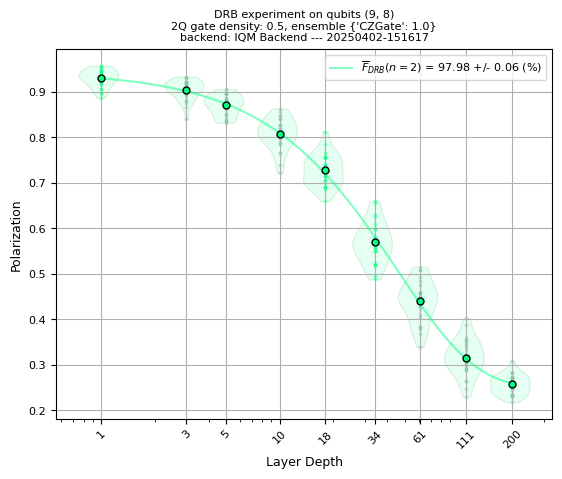

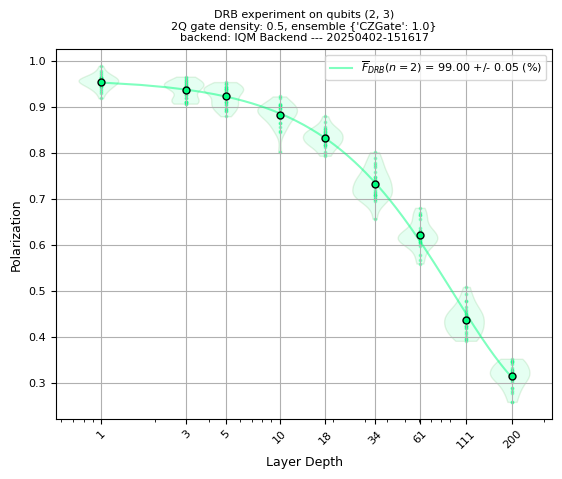

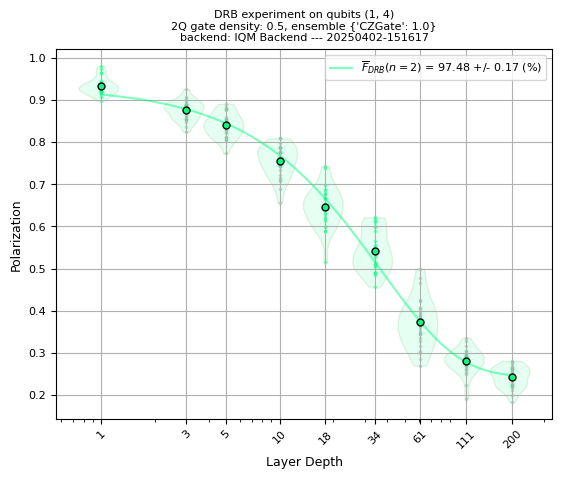

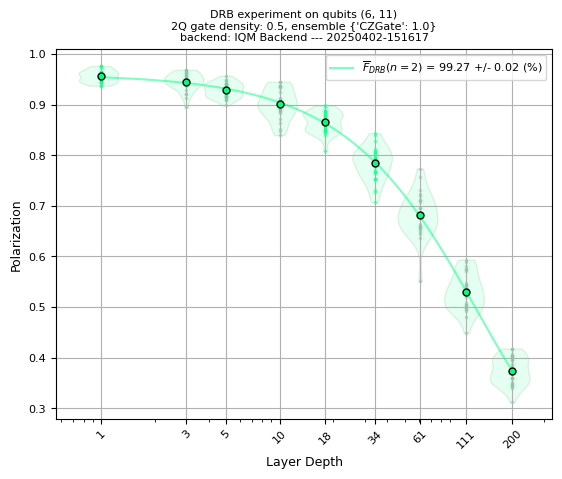

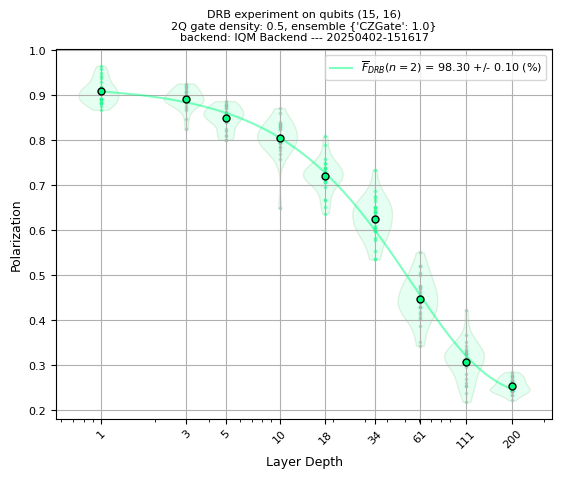

In [12]:
result_eplg.plot_all()